### Data Analysis in a Grocerie DataSet

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [51]:
df = pd.read_csv('Groceries_dataset.csv')

In [19]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [20]:
df.shape

(38765, 3)

In [21]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [22]:
total_days = len(np.unique(df['Date']))
total_products = len(df.itemDescription)
print('Total Products', total_products)
print('Total Days', total_days) 
print('Total Months', int(total_days/30))

Total Products 38765
Total Days 728
Total Months 24


$ \rightarrow $This dataset represents the sales of 38765 products in an interval of 2 years 

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [25]:
df.set_index(['Date'],inplace = True)
df

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


In [26]:
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
toilet cleaner              5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

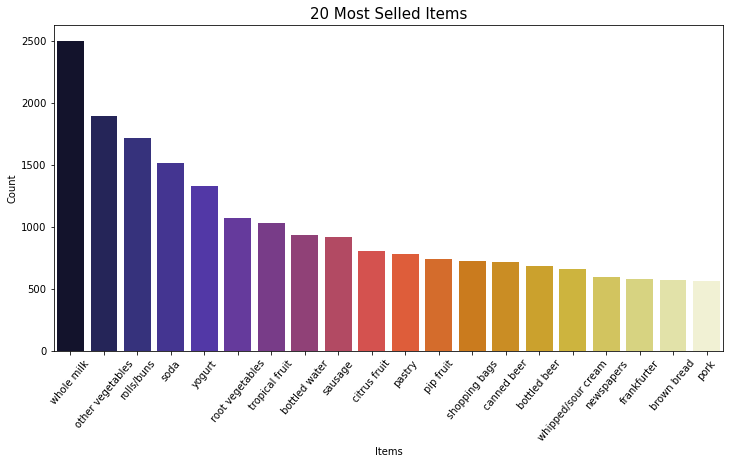

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(df.itemDescription.value_counts().head(20).index, 
        df.itemDescription.value_counts().head(20).values, palette = 'CMRmap')
plt.xticks(rotation = 50)
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('20 Most Selled Items', size = 15)
plt.show()

In [52]:
#I will use groupby function so we have the items in a list separately
df=df.groupby(['Member_number', 'Date'])['itemDescription'].apply(lambda x:
                                                                 list(x))

In [53]:
df.head()

Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
Name: itemDescription, dtype: object

In [30]:
#Transforming for a format that i can use in the apriori algorithm
transactions = list(df)

$ \rightarrow $ With this application of apriori we'll have all the rules analysing all the items together.

In [31]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.0001, min_lift = 2, min_confidence = 0.2)
results = list(rules)
len(results)

1919

In [32]:
results[:10]

[RelationRecord(items=frozenset({'soda', 'artif. sweetener'}), support=0.00046782062420637575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'soda'}), confidence=0.2413793103448276, lift=2.4857251346797353)]),
 RelationRecord(items=frozenset({'bags', 'yogurt'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bags'}), items_add=frozenset({'yogurt'}), confidence=0.5, lift=5.822178988326848)]),
 RelationRecord(items=frozenset({'brandy', 'whole milk'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)]),
 RelationRecord(items=frozenset({'chicken', 'organic products'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'organic products'}), items_add=frozenset({'chicken'}), confidence=0.2, lift=7.1764988009

In [34]:
#A means 'IF' and B means 'SO' in the rule
A = [] 
B = [] 
support = []
confidence = []
lift = []

for result in results:
    s = result[1] 
    result_rules = result[2] 
    
    for result_rule in result_rules: 
        a = list(result_rule[0]) 
        b = list(result_rule[1]) 
        c = result_rule[2] 
        l = result_rule[3] 
        #print(a ,' -- ', b, '--', c, '--', l)
        
        A.append(a)
        B.append(b)
        support.append(s)
        confidence.append(c)
        lift.append(l)

In [40]:
rules_df = pd.DataFrame({'A': A, 'B': B, 'Support': support,
                         'Confidence': confidence, 'Lift':lift})

In [41]:
#Analysing by the Lift value
rules_df.sort_values(by = 'Lift', ascending=False)

,A,B,Support,Confidence,Lift
4136,"[other vegetables, waffles, sausage]","[whole milk, prosecco]",0.000134,0.400000,2992.600000
4132,"[whole milk, prosecco]","[other vegetables, waffles, sausage]",0.000134,1.000000,2992.600000
4129,"[other vegetables, prosecco]","[whole milk, waffles, sausage]",0.000134,0.500000,1870.375000
4141,"[whole milk, waffles, sausage]","[other vegetables, prosecco]",0.000134,0.500000,1870.375000
3317,"[vinegar, whole milk]","[frankfurter, softener]",0.000134,0.250000,1246.916667
...,...,...,...,...,...
3847,"[soda, whole milk, shopping bags]",[rolls/buns],0.000134,0.222222,2.020116
3761,"[sausage, whole milk, pork]",[rolls/buns],0.000134,0.222222,2.020116
1531,"[hamburger meat, pip fruit]",[rolls/buns],0.000134,0.222222,2.020116
867,"[frozen vegetables, chocolate]",[rolls/buns],0.000134,0.222222,2.020116


$ \rightarrow $We could get an insigth from here by analysing all these rules. For example, we could make a sale including whole milk, prosecco, other vegetables, waffles and sausage, once these items are bought together with max confidence (1.0) and a high value from the Lift, which means that costumers that buy whole milk and prosecco, are 2992.6 times more likely to buy other vegetables, waffles and sausage.

$ \rightarrow $Another insight we could get is to organize the market shelves by placing these items closer together, once we know that costumers do associate them when they are doing groceries.

In [39]:
#Anaylising by the Confidence value
rules_df.sort_values(by = 'Confidence', ascending=False)

,A,B,Support,Confidence,Lift
2967,"[specialty chocolate, whole milk, tropical fruit]",[citrus fruit],0.000134,1.0,18.821384
2766,"[curd, citrus fruit, dessert]",[other vegetables],0.000134,1.0,8.189929
667,"[dishes, cat food]",[canned beer],0.000134,1.0,21.314815
2805,"[dishes, frankfurter, whipped/sour cream]",[citrus fruit],0.000134,1.0,18.821384
2802,"[dishes, frankfurter, citrus fruit]",[whipped/sour cream],0.000134,1.0,22.879205
...,...,...,...,...,...
930,"[onions, citrus fruit]",[frozen vegetables],0.000134,0.2,7.142243
211,"[white bread, berries]",[soda],0.000134,0.2,2.059601
926,"[frankfurter, tropical fruit]",[citrus fruit],0.000267,0.2,3.764277
922,"[ice cream, citrus fruit]",[frankfurter],0.000134,0.2,5.296637
